### Import required libraries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

### import database

In [133]:
df= pd.read_csv('heart.csv', sep=',')
# df.columns=['','Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Thal','AHD']
df.head()
df.size
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [92]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Visualize database

Text(0.5, 1.0, 'Age-chocolesterol plot')

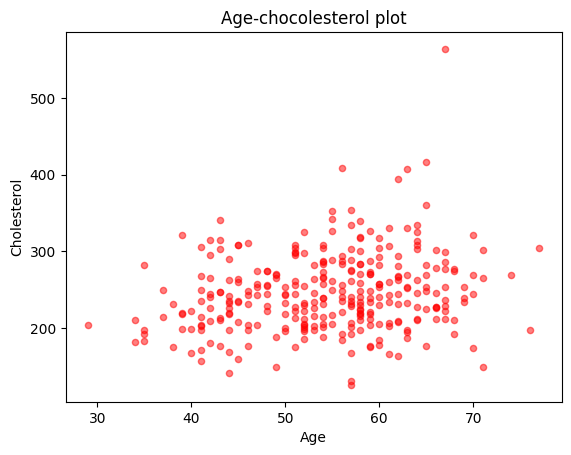

In [93]:
df.plot(kind='scatter', x='Age', y='Chol', alpha= 0.5, color= 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-chocolesterol plot')

### split datasets

In [138]:
df.fillna(0, inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


In [139]:
df_new= pd.get_dummies(df, columns=['ChestPain', 'Thal'], drop_first=True)

In [140]:
X= df_new.drop('AHD', axis=1)
y= df_new.AHD

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

### training model


In [143]:
from sklearn.model_selection import GridSearchCV

ml = svm.SVC()

para_grid=[ {'C': [1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['rbf']}]

grid= GridSearchCV(ml, para_grid, refit= True, verbose= 1, cv= 5, n_jobs= -1, error_score='raise')

grid_search= grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [144]:
print( grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [145]:
print( grid_search.best_score_)

0.6034863945578232


In [149]:
y_test_hat= grid.predict(X_test)

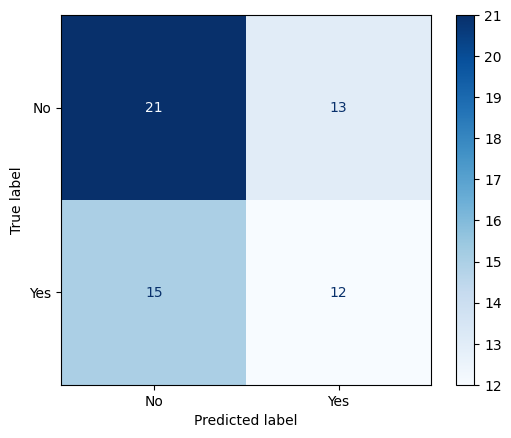

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_mat = confusion_matrix(y_test, y_test_hat)
disp= ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=grid.classes_)
fig, ax = plt.subplots()
fig = disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [155]:
print( classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

          No       0.58      0.62      0.60        34
         Yes       0.48      0.44      0.46        27

    accuracy                           0.54        61
   macro avg       0.53      0.53      0.53        61
weighted avg       0.54      0.54      0.54        61

